# Table of Contents
- [ Detailed panel](#_detailed panel) 
  - [ Weekly incidence curve with typical intensity and thresholds](#_weekly incidence curve with typical intensity and thresholds) 
    - [ Function for incidence plot:](#_function for incidence plot:) 
    - [ State example](#_state example) 
    - [ Regional example](#_regional example) 
    - [  Example with state where estimates are not available:](#_ example with state where estimates are not available:) 
  - [ Obtaining the most probable activity level at selected week](#_obtaining the most probable activity level at selected week) 
  - [ Age distribution](#_age distribution) 
    - [ Function for age distribution plot:](#_function for age distribution plot:) 
  - [ Incidence table information](#_incidence table information) 
- [ Summary panel](#_summary panel) 
  - [ Season level categorization:](#_season level categorization:) 
    - [ Function to calculate seasonal level](#_function to calculate seasonal level) 
    - [ Example applying to a given entry](#_example applying to a given entry) 
    - [ Applying to the whole dataset](#_applying to the whole dataset) 
  - [ Seasonal age distribution](#_seasonal age distribution) 
  - [ Incidence table information](#_incidence table information) 


# Detailed panel<a name="_detailed panel"></a>

## Weekly incidence curve with typical intensity and thresholds<a name="_weekly incidence curve with typical intensity and thresholds"></a>

In [2]:
# coding:utf8

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
import numpy as np

%matplotlib inline

In this example, we show the current year incidence up to given week.<br>

Along with the current incidence, we present the following intensity thresholds:<br>

* Low activity threshold: estimated epidemic threshold based on historical levels. Minimum: incidence equivalent to 5 cases.

* High activity threshold: incidence considered high based on historical levels. Minimum: incidence equivalent to 10 cases.

* Very high activity threshold: incidence considered very high based on historical levels. Minimum: incidence equivalent to 20 cases.

In [3]:
dfincidence = pd.read_csv('../data/current_estimated_values.csv', encoding='utf-8')
dftypical = pd.read_csv('../data/mem-typical.csv', encoding='utf-8')
dfthresholds = pd.read_csv('../data/mem-report.csv', encoding='utf-8')
level_dict = {'L0': 'Baixa', 'L1': 'Epidêmica',
              'L2': 'Alta', 'L3': 'Muito alta'}

In [4]:
dfincidence.columns

Index(['DT_NOTIFIC_epiyearweek', 'UF', 'epiyear', 'epiweek', 'SRAG', 'Tipo',
       'Situation', 'mean', '50%', '2.5%', '97.5%', 'L0', 'L1', 'L2', 'L3',
       'Run date'],
      dtype='object')

- UF: locality code (includes UFs, Regions and Country)
- Tipo: locality type (Estado, Regional or País)
- mean: estimated mean incidence
- 50%: estimated median
- 2.5%: estimation lower 95% confidence interval
- 97.5%: estimation upper 95% confidence interval
- L0: probability of being below epi. threshold (low level)
- L1: probability of being above epi. threshold and below high activity (epidemic level)
- L2: prob. of being above high activity and below very high (high level)
- L3: prob. of being above very high activity threshold (very high level)
- Situation:
    - stable: might suffer minor changes in the future. Reliable as is;
    - estimated: data estimated based on opportunity (i.e. notification delay) profile. Reliable within confidence interval;
    - unknown: might suffer significant changes in the coming weeks. This is the case for locations where estimation is not possible and data is still "fresh". Unreliable.

In [5]:
dfincidence.head(10)

,DT_NOTIFIC_epiyearweek,UF,epiyear,epiweek,SRAG,Tipo,Situation,mean,50%,2.5%,97.5%,L0,L1,L2,L3,Run date
0,2009W01,11,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
1,2009W01,12,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
2,2009W01,13,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
3,2009W01,14,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
4,2009W01,15,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
5,2009W01,16,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
6,2009W01,17,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
7,2009W01,21,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
8,2009W01,22,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13
9,2009W01,23,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13


In [6]:
dftypical.head(10)

,UF,População,epiweek,corredor baixo,corredor mediano,corredor alto,Unidade da Federação,Tipo
0,11,1787279,1,0.000000,0.000000,0.000000,Rondônia,Estado
1,11,1787279,2,0.000000,0.000000,0.000000,Rondônia,Estado
2,11,1787279,3,0.339327,0.339327,0.339327,Rondônia,Estado
3,11,1787279,4,0.056555,0.056555,0.056555,Rondônia,Estado
4,11,1787279,5,0.113109,0.113109,0.113109,Rondônia,Estado
5,11,1787279,6,0.000000,0.000000,0.000000,Rondônia,Estado
6,11,1787279,7,0.226218,0.226218,0.226218,Rondônia,Estado
7,11,1787279,8,0.058217,0.058947,0.059686,Rondônia,Estado
8,11,1787279,9,0.000000,0.000000,0.000000,Rondônia,Estado
9,11,1787279,10,0.033013,0.099082,0.297373,Rondônia,Estado


In [7]:
dfthresholds.tail(10)

,UF,População,Média geométrica do pico de infecção das temporadas regulares,limiar pré-epidêmico,intensidade alta,intensidade muito alta,se típica do início do surto,IC da se típica do início do surto,duração típica do surto,IC da duração típica do surto,Unidade da Federação,Tipo
22,43,11286500,0.784539,0.315823,1.116211,1.898509,20.0,[18.0-22.0],14.0,[12.0-16.0],Rio Grande do Sul,Estado
23,50,2682386,0.408308,0.557307,0.991530,1.479489,20.0,[18.0-23.0],11.0,[5.0-23.0],Mato Grosso do Sul,Estado
24,51,3305531,0.159167,0.151262,0.302523,0.605047,NaN,NaN,NaN,NaN,Mato Grosso,Estado
25,52,6695855,0.287897,0.197337,0.275105,0.359598,21.0,[12.0-36.0],7.0,[4.0-11.0],Goiás,Estado
26,53,2977216,0.401461,0.244760,0.445889,0.671769,15.0,[9.0-24.0],11.0,[9.0-13.0],Distrito Federal,Estado
27,BR,206081432,0.422669,0.174155,0.488576,0.697003,16.0,[11.0-23.0],12.0,[10.0-14.0],Brasil,País
28,RegC,27359337,0.246330,0.096001,0.226716,0.312417,16.0,[11.0-22.0],12.0,[10.0-16.0],Regional Centro,Regional
29,RegL,67360182,0.108547,0.081896,0.146960,0.195710,15.0,[10.0-21.0],12.0,[9.0-16.0],Regional Leste,Regional
30,RegN,16174881,0.200424,0.087873,0.208579,0.323719,13.0,[10.0-17.0],11.0,[9.0-14.0],Regional Norte,Regional
31,RegS,95187032,0.585316,0.286125,0.885425,1.309426,16.0,[11.0-23.0],12.0,[10.0-14.0],Regional Sul,Regional


Entries with dfthresholds['se típica do inicio do surto'] = NaN have activity too low for proper epidemic threshold definition

In [8]:
df = pd.merge(dfincidence, dfthresholds[['UF','Unidade da Federação']], on='UF')
df.head(10)

,DT_NOTIFIC_epiyearweek,UF,epiyear,epiweek,SRAG,Tipo,Situation,mean,50%,2.5%,97.5%,L0,L1,L2,L3,Run date,Unidade da Federação
0,2009W01,11,2009,1,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
1,2009W02,11,2009,2,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
2,2009W03,11,2009,3,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
3,2009W04,11,2009,4,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
4,2009W05,11,2009,5,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
5,2009W06,11,2009,6,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
6,2009W07,11,2009,7,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
7,2009W08,11,2009,8,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
8,2009W09,11,2009,9,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia
9,2009W10,11,2009,10,0.0,Estado,stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2016-11-13,Rondônia


### Function for incidence plot:<a name="_function for incidence plot:"></a>

In [9]:
def plot_timeseries(df, dfthres, dftyp):
    
    # Set font properties
    fontproplgd = fm.FontProperties('Oswald')
    fontproplgd.set_size(28)
    fontproplbl = fm.FontProperties('Oswald')
    fontproplbl.set_size(42)
    fontpropticks = fm.FontProperties('Oswald')
    fontpropticks.set_size(24)

    # Set figure size
    fig, ax = plt.subplots(1, 1, figsize = [20, 20])

    # Set ymax at least = 1:
    max_typ = dftyp['corredor alto'].max()
    max_thres = dfthres['intensidade muito alta'].max()
    max_ts = df[['SRAG', '50%']].max().max()
    maxval1 = max([max_typ, max_thres, max_ts, 1])
    ax.set_ylim([0,maxval1])

    # Plot lines and regions:
    ax.fill_between(dftyp['epiweek'], 0, dftyp['corredor baixo'], color='green', alpha=0.5)
    ax.fill_between(dftyp['epiweek'], dftyp['corredor baixo'], dftyp['corredor mediano'], color='yellow', alpha=0.5)
    ax.fill_between(dftyp['epiweek'], dftyp['corredor mediano'], dftyp['corredor alto'], color='orange', alpha=0.5)
    try:
        df.plot(ax=ax, x='epiweek', y='SRAG', color='k', lw=3, label='Casos notificados')
    except:
        pass
    try:
        minweek = int(df.loc[df['Situation']=='estimated','epiweek'].min())
        df_est = df[df['epiweek']>=minweek]
        df_est.plot(ax=ax, x='epiweek', y='50%', color='r', lw=3, label='Casos estimados')
        df_est.plot(ax=ax, x='epiweek', y='2.5%', color='r', lw=3, style='--', label='Intervalo de confiança')
        df_est.plot(ax=ax, x='epiweek', y='97.5%', color='r', lw=3, style='--', label='')
    except:
        pass
    try:
        minweek = int(df.loc[df['Situation']=='unknown','epiweek'].min())
        df_est = df[df['epiweek']>=minweek]
        df_est.plot(ax=ax, x='epiweek', y='97.5%', color='silver', lw=3, style='--', label='Dados potencialmente\nincompletos')
    except:
        pass

    plt.axhline(y=np.float(dfthres['limiar pré-epidêmico']), label='limiar pré-epidêmico', ls='--', lw=3,
                color='yellow')
    plt.axhline(y=np.float(dfthres['intensidade alta']), label='intensidade alta', ls='--', lw=3,
                color='orange')
    plt.axhline(y=np.float(dfthres['intensidade muito alta']), label='intensidade muito alta', ls='--', lw=3,
                color='darkred')
    dftyp.plot(ax=ax, x='epiweek', y='corredor alto', legend=False, alpha=0)

    # Grab ylim in order to set the range for the red zone:
    miny, maxy = ax.get_ylim()
    del(ax.lines[-1])
    ax.fill_between(dftyp['epiweek'], dftyp['corredor alto'], maxy, color='red', alpha=0.5)
    ax.set_ylim([miny, maxy])

    # Draw vertical line indicating user selected week:
    plt.axvline(axes=ax, x=week, color='silver', lw=8, alpha=0.5)

    # Use defined font properties for axis tick labels
    for label in ax.get_xticklabels() :
        label.set_fontproperties(fontpropticks)    
    for label in ax.get_yticklabels() :
        label.set_fontproperties(fontpropticks)

    uf = df['Unidade da Federação'].unique()[0]
    ax.set_title(uf, fontproperties=fontproplbl)
    ax.set_xlabel('SE', fontproperties=fontproplbl)
    ax.set_ylabel('Incidência (por 100mil habitantes)', fontproperties=fontproplbl)
    xticks = np.arange(4,53,4)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(prop=fontproplgd, loc='center left', bbox_to_anchor=(1,0.5))

    if (df.loc[df['epiweek'] == week, 'Situation'].values[0] == 'estimated'):
        activity_levels = df.loc[df.epiweek == week, level_dict.keys()]
        ax.text(1.01, 0.99, s=str('Probabilidade do nível de atividade:\n'+
                                  'Baixa: %s\n'+
                                  'Epidêmica: %s\n'+
                                  'Alta: %s\n'+
                                  'Muito alta: %s') % 
                ('{:.1f}%'.format(100*float(activity_levels['L0'])),
                 '{:.1f}%'.format(100*float(activity_levels['L1'])), 
                 '{:.1f}%'.format(100*float(activity_levels['L2'])),
                 '{:.1f}%'.format(100*float(activity_levels['L3']))),
                fontproperties=fontproplgd, ha='left', va='top', transform=ax.transAxes)
        txt = '*Dados estimados sujeitos a alterações futuras.' 
    elif (df.loc[df.epiweek == week, 'Situation'].values[0] == 'stable'):
        df_level = df.loc[(df['epiweek'] == week), level_dict.keys()].unstack().copy()
        df_level.sort_values(ascending=False, inplace=True)
        activity_level = df_level.index[0][0]
        ax.text(1.01, 0.99, s=str('Nível de atividade:\n'+
                                  '%s\n') % level_dict[activity_level],
                fontproperties=fontproplgd, ha='left', va='top', transform=ax.transAxes)
        txt = '*Dados sujeitos a alterações futuras.'
    else:
        df_level = df.loc[(df['epiweek'] == week), level_dict.keys()].unstack().copy()
        df_level.sort_values(ascending=False, inplace=True)
        activity_level = df_level.index[0][0]
        ax.text(1.01, 0.99, s=str('Nível de atividade:\n'+
                                  '%s\n') % level_dict[activity_level],
                fontproperties=fontproplgd, ha='left', va='top', transform=ax.transAxes)
        txt = '*Dados potencialmente incompletos,\nsujeitos a alterações futuras.'
    ax.text(.99, 0.99, s=txt, fontproperties=fontpropticks, ha='right', va='top', transform=ax.transAxes)


    return

### State example<a name="_state example"></a>

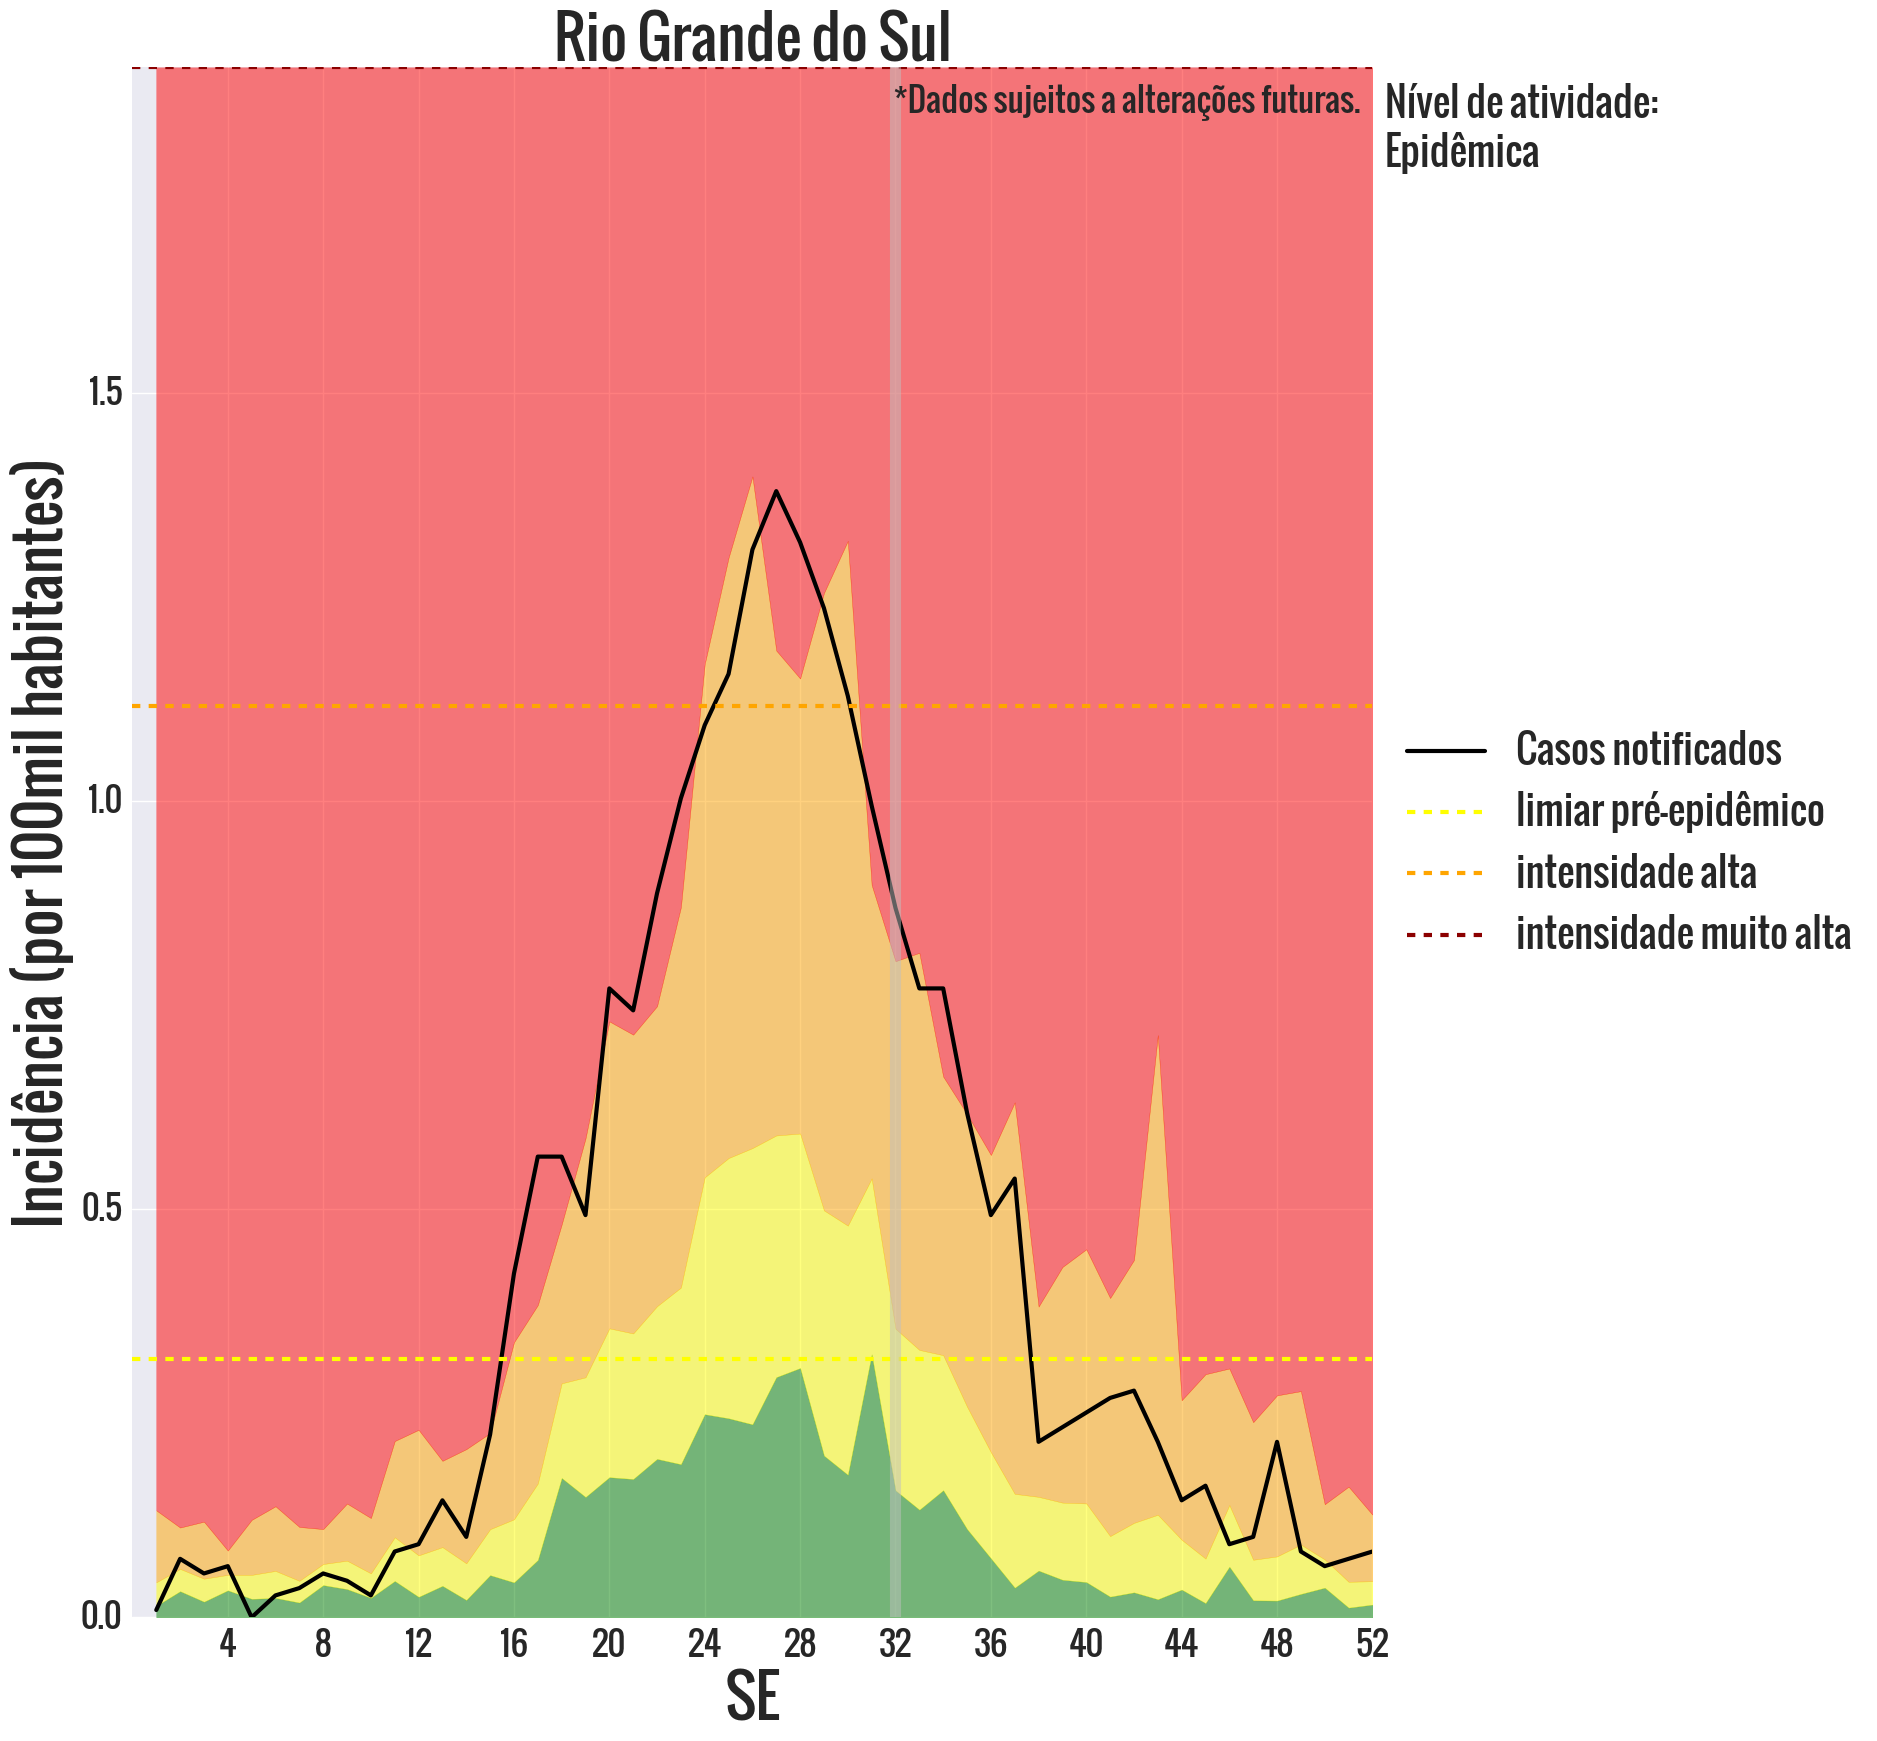

In [10]:
season = 2013
uf = 'Rio Grande do Sul'
week = 32
df_tmp = df[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season)]
dftyp_tmp = dftypical[dftypical['Unidade da Federação'] == uf]
dfthres_tmp = dfthresholds[dfthresholds['Unidade da Federação'] == uf]
plot_timeseries(df=df_tmp, dfthres=dfthres_tmp, dftyp=dftyp_tmp)

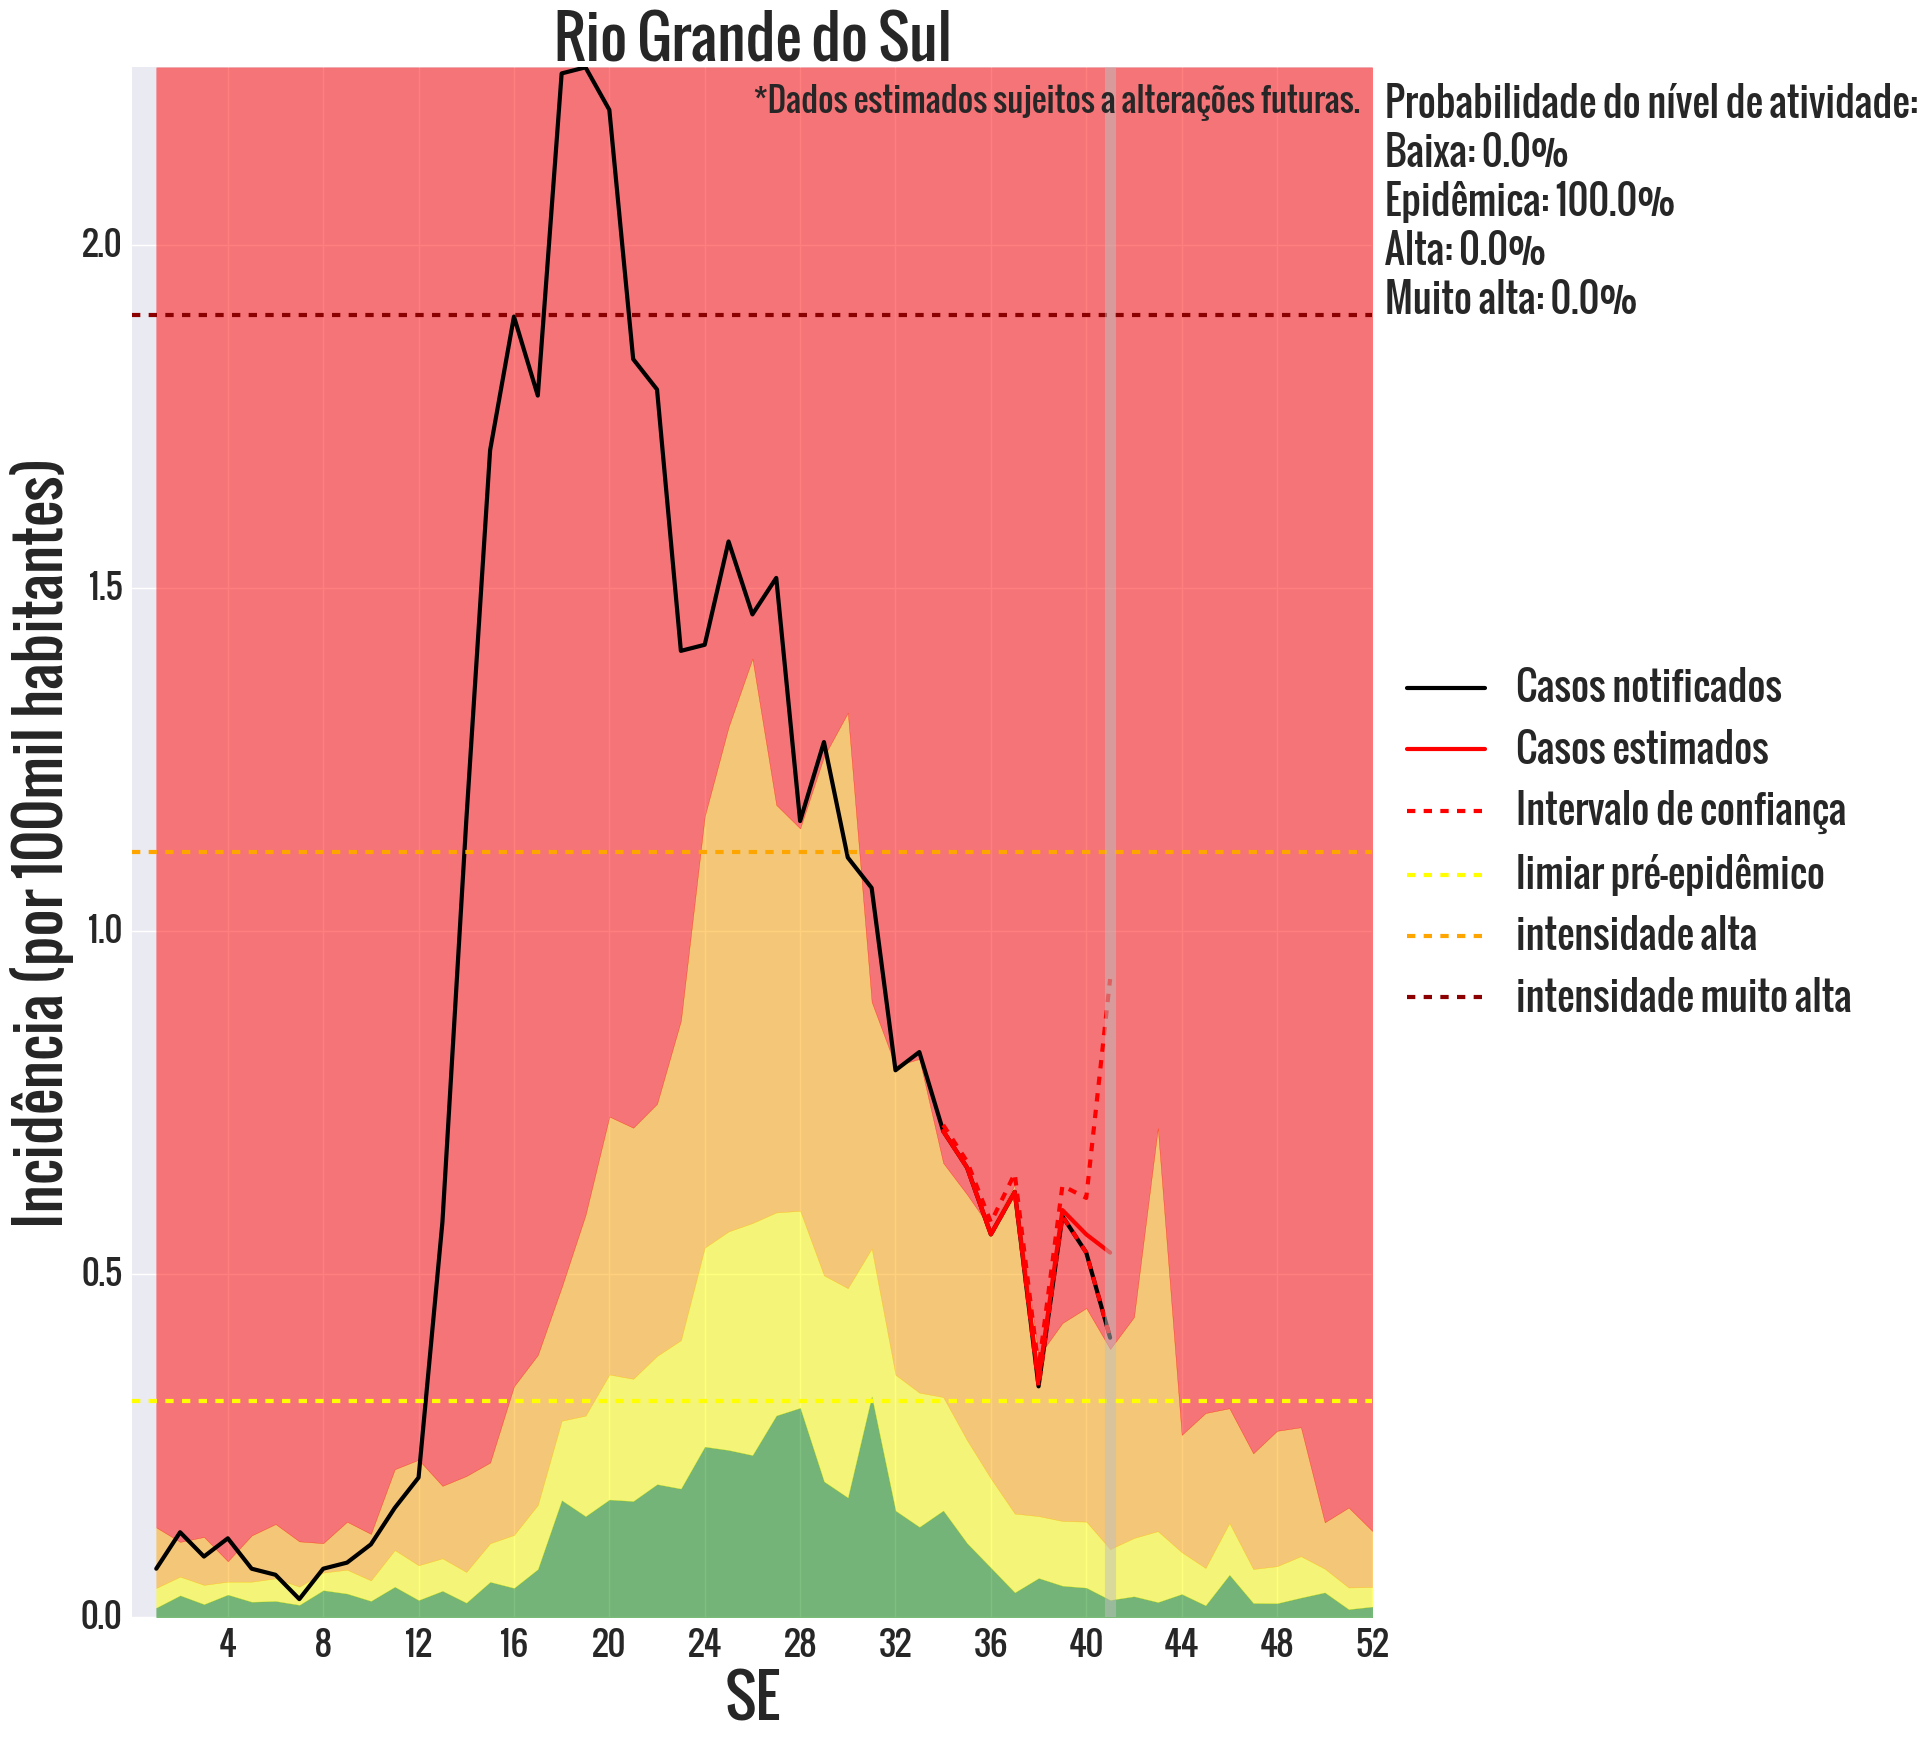

In [11]:
season = 2016
uf = 'Rio Grande do Sul'
week = 41
df_tmp = df[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season)]
dftyp_tmp = dftypical[dftypical['Unidade da Federação'] == uf]
dfthres_tmp = dfthresholds[dfthresholds['Unidade da Federação'] == uf]
plot_timeseries(df=df_tmp, dftyp=dftyp_tmp, dfthres=dfthres_tmp)

### Regional example<a name="_regional example"></a>

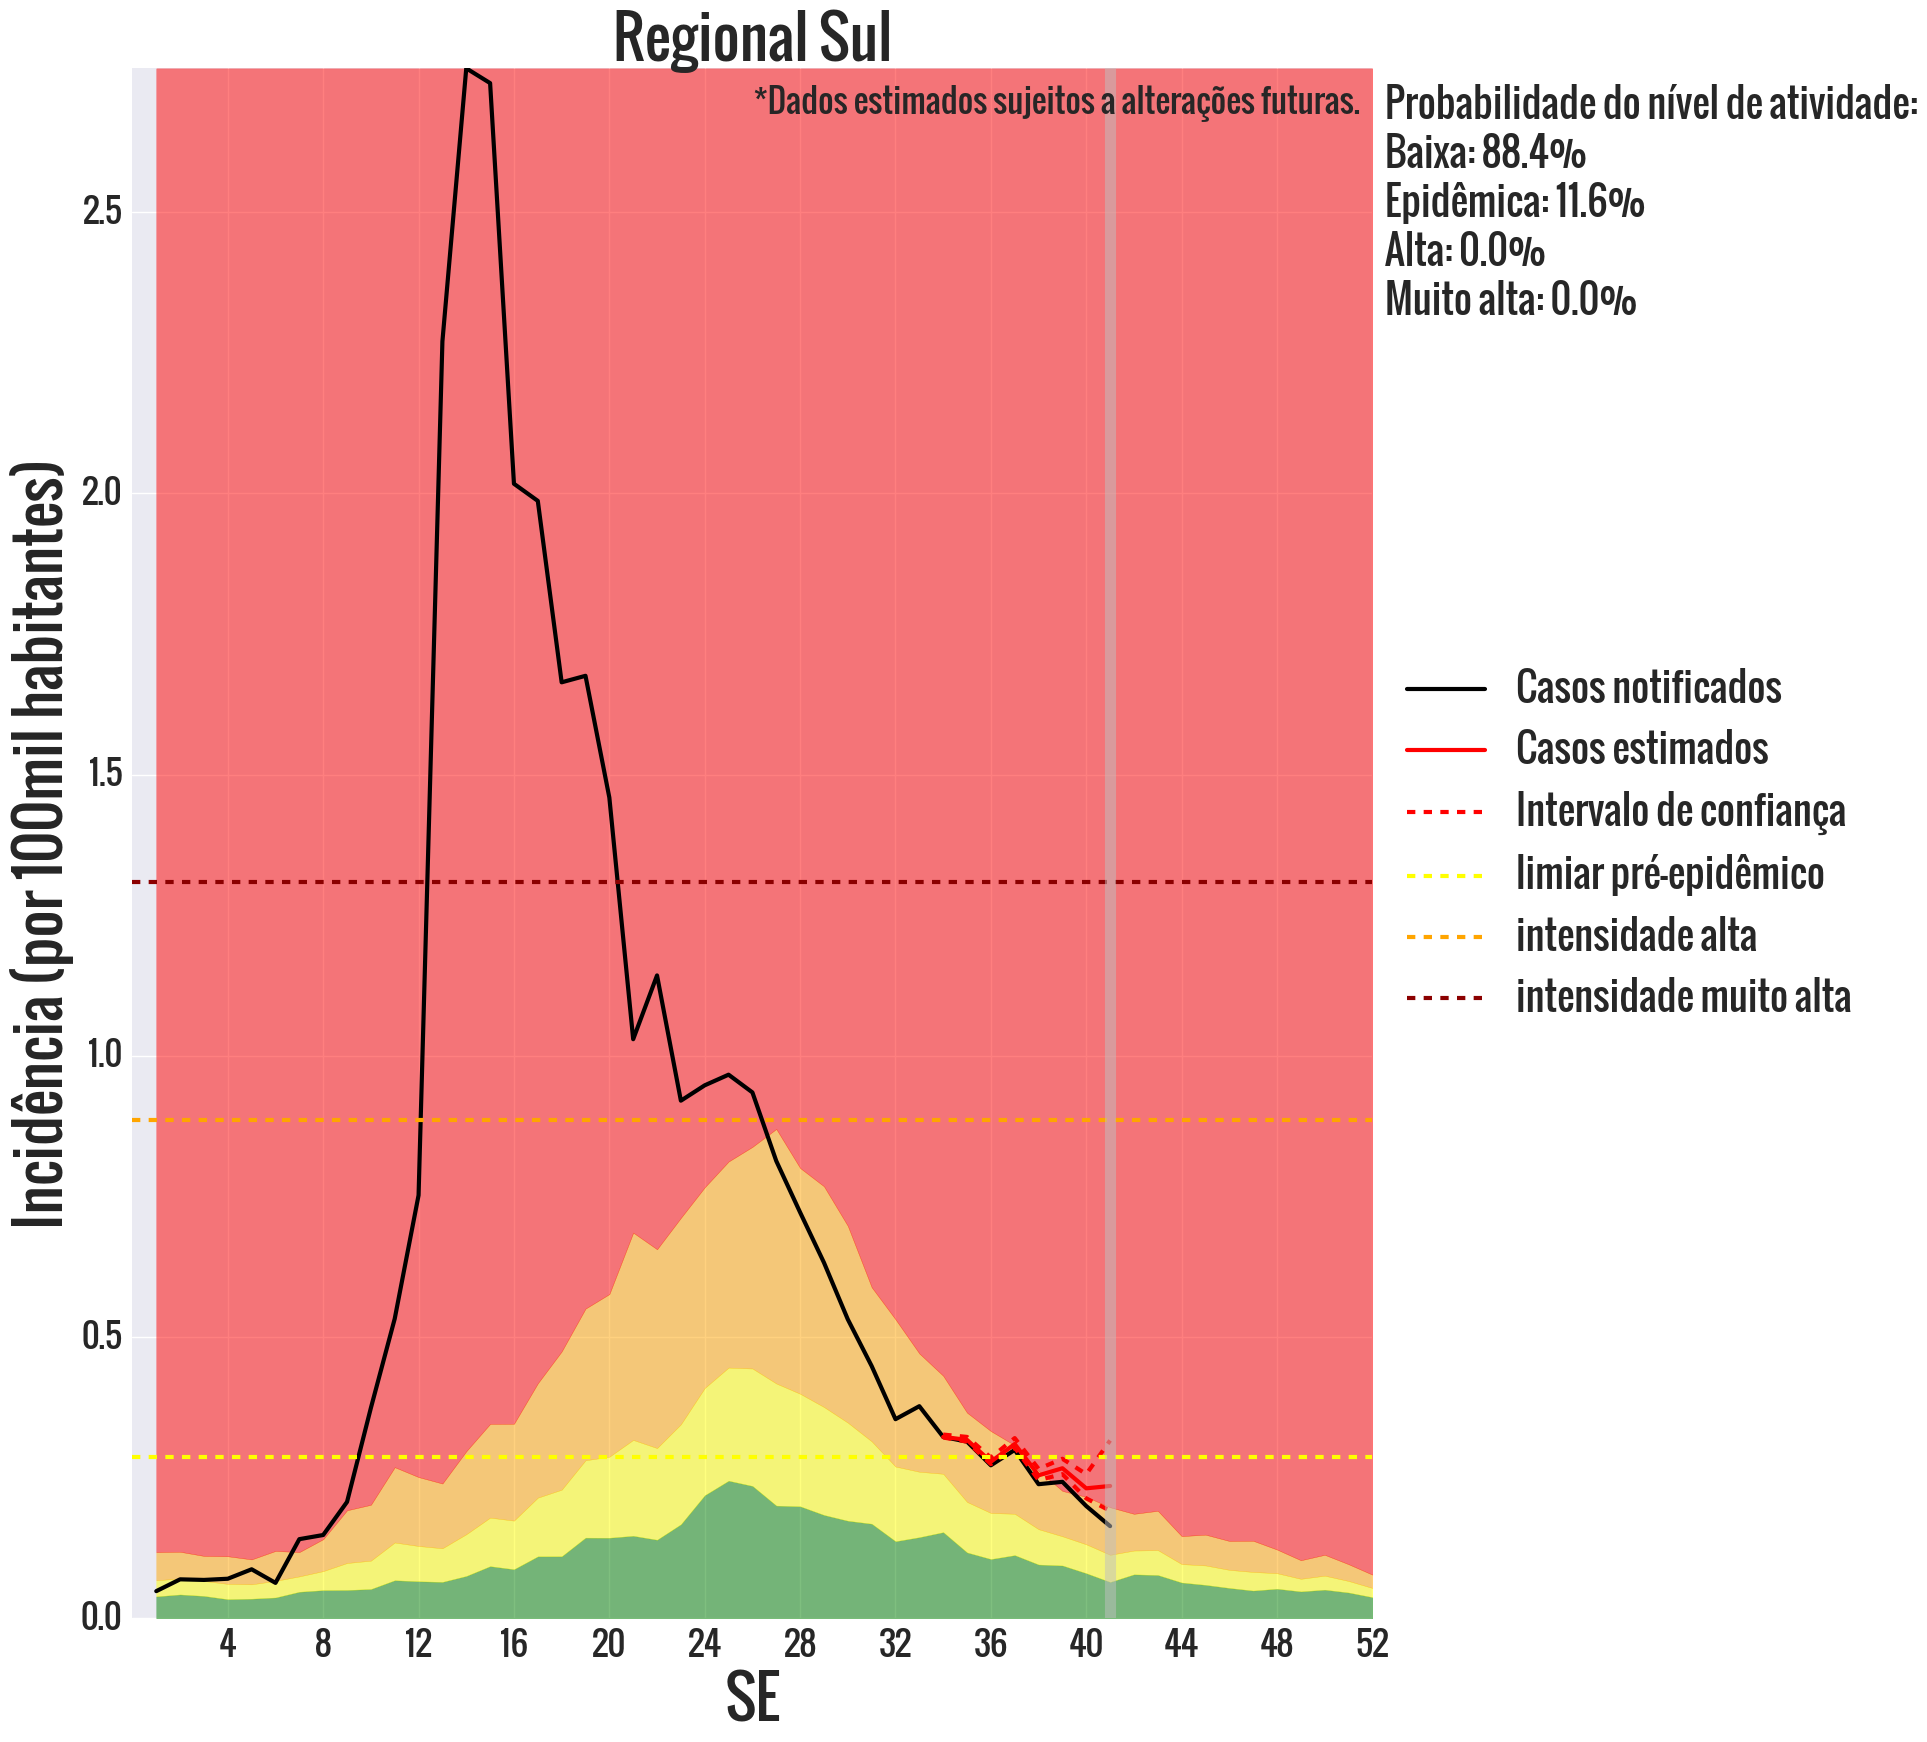

In [12]:
season = 2016
uf = 'Regional Sul'
week = 41
df_tmp = df[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season)]
dftyp_tmp = dftypical[dftypical['Unidade da Federação'] == uf]
dfthres_tmp = dfthresholds[dfthresholds['Unidade da Federação'] == uf]
plot_timeseries(df=df_tmp, dfthres=dfthres_tmp, dftyp=dftyp_tmp)

###  Example with state where estimates are not available:<a name="_ example with state where estimates are not available:"></a>

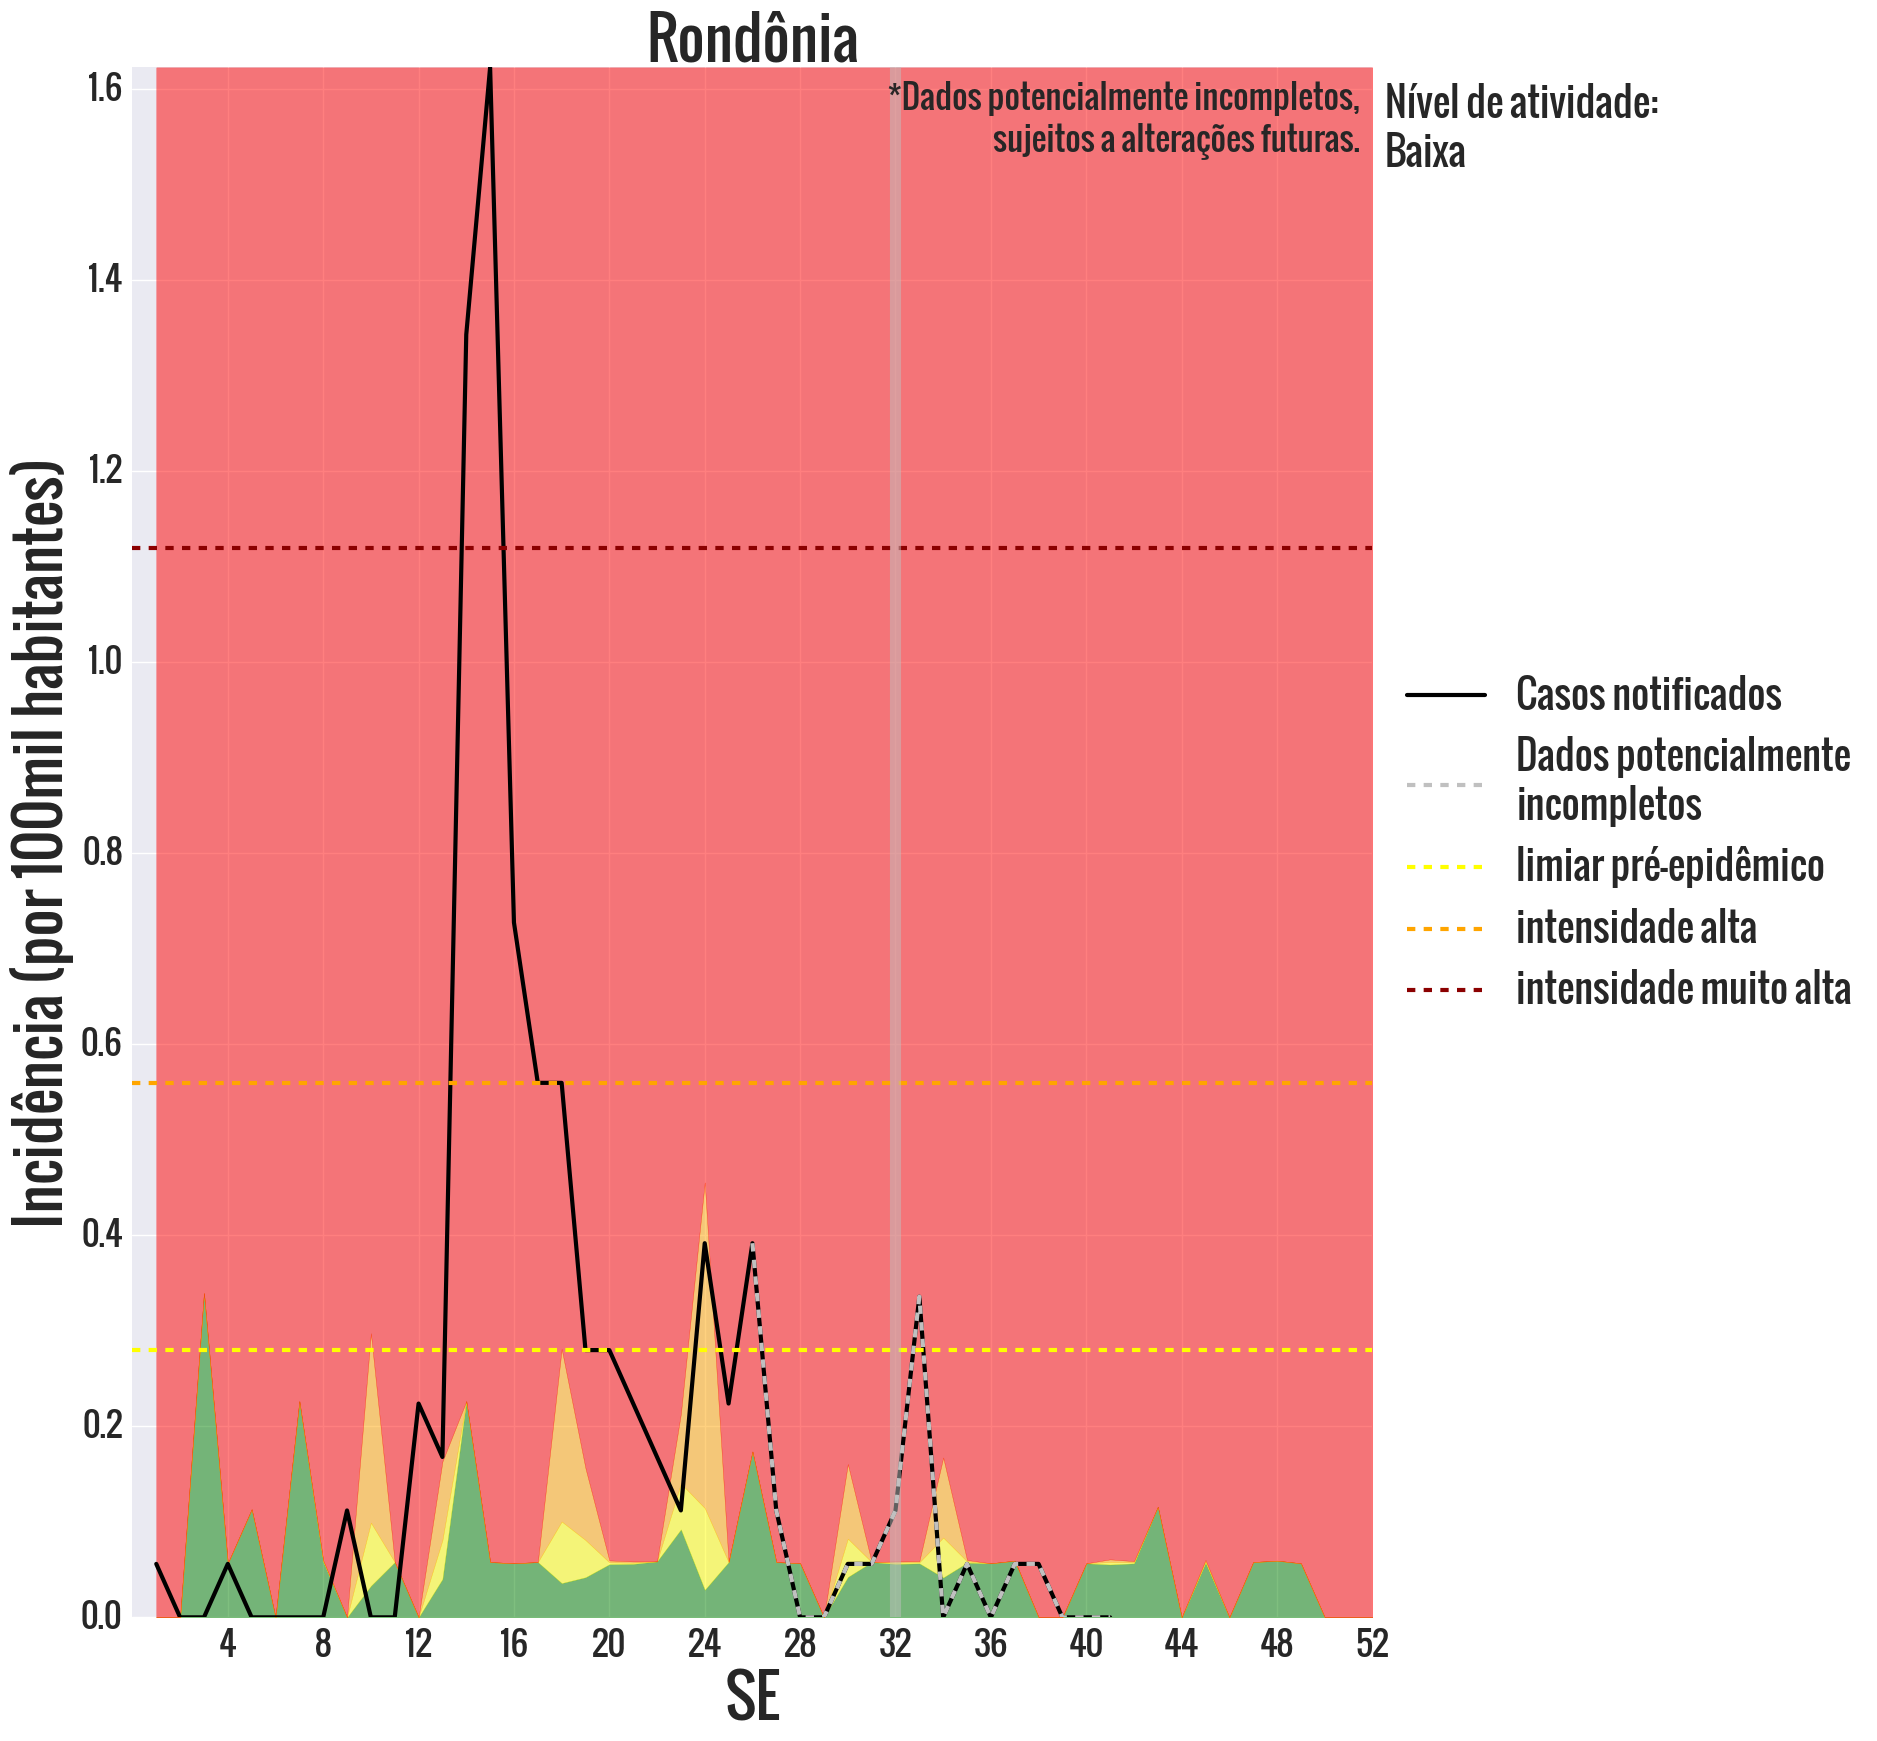

In [13]:
season = 2016
uf = 'Rondônia'
week = 32
df_tmp = df[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season)]
dftyp_tmp = dftypical[dftypical['Unidade da Federação'] == uf]
dfthres_tmp = dfthresholds[dfthresholds['Unidade da Federação'] == uf]
plot_timeseries(df=df_tmp, dfthres=dfthres_tmp, dftyp=dftyp_tmp)

## Obtaining the most probable activity level at selected week<a name="_obtaining the most probable activity level at selected week"></a>

Create column with the most probable activity level per week:

In [14]:
df['Level'] = df[list(level_dict.keys())].idxmax(axis=1)

In [15]:
season = 2016
uf = 'Rio Grande do Sul'
week = 41
df_tmp_week_level = df.loc[(df['Unidade da Federação'] == uf) & (df['epiyear'] == season) & (df['epiweek'] == week),
                       list(level_dict.keys())+['Level']]
df_tmp_week_level

,L2,L1,L0,L3,Level
9337,0.0,1.0,0.0,0.0,L1


In [16]:
activity_level = df_tmp_week_level['Level'].values[0]
activity_level_prob = float(df_tmp_week_level[activity_level])
print(level_dict[activity_level], '{:.1f}%'.format(100*activity_level_prob))

Epidêmica 100.0%


## Age distribution<a name="_age distribution"></a>

In [17]:
df_age_dist = pd.read_csv('../data/clean_data_epiweek-weekly-incidence_w_situation.csv', low_memory=False, encoding='utf-8')
df_age_dist.rename(columns={'sexo': 'Sexo'}, inplace=True)

In [18]:
df_age_dist.columns

Index(['UF', 'epiyear', 'epiweek', 'Sexo', 'SRAG', '0-4 anos', '5-9 anos',
       '10-19 anos', '20-29 anos', '30-39 anos', '40-49 anos', '50-59 anos',
       '60+ anos', 'Unidade da Federação', 'Tipo', 'Situation'],
      dtype='object')

In [19]:
df_age_dist.head()

,UF,epiyear,epiweek,Sexo,SRAG,0-4 anos,5-9 anos,10-19 anos,20-29 anos,30-39 anos,40-49 anos,50-59 anos,60+ anos,Unidade da Federação,Tipo,Situation
0,11,2009,1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rondônia,Estado,stable
1,11,2009,1,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rondônia,Estado,stable
2,11,2009,1,Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rondônia,Estado,stable
3,11,2009,2,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rondônia,Estado,stable
4,11,2009,2,M,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rondônia,Estado,stable


### Function for age distribution plot:<a name="_function for age distribution plot:"></a>

In [20]:
def plot_agedist(df):
    '''
    Plot incidence profile by age
    '''
    
        # Set font properties
    fontproplgd = fm.FontProperties('Oswald')
    fontproplgd.set_size(28)
    fontproplbl = fm.FontProperties('Oswald')
    fontproplbl.set_size(42)
    fontpropticks = fm.FontProperties('Oswald')
    fontpropticks.set_size(24)

    # Set figure size
    fig, ax = plt.subplots(1, 1, figsize = [20, 20])

    # Check data situation
    data_situation = df['Situation'].values[0]
    if data_situation == 'stable':
        txt = '*Dados sujeitos a pequenas alterações futuras'
    else:
        txt = '*Dados potencialmente incompletos,\nsujeitos a alterações futuras'
        
    age_cols = ['0-4 anos', '5-9 anos', '10-19 anos', '20-29 anos', '30-39 anos',
       '40-49 anos', '50-59 anos', '60+ anos']
    df_agedist = df[age_cols+['Sexo']].set_index('Sexo').transpose()
    df_agedist.rename(columns={'F': 'Mulheres', 'M':'Homens'}, inplace=True)
    ax = df_agedist[['Homens', 'Mulheres', 'Total']].plot(kind='bar', ax=ax)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontproperties=fontpropticks)
    plt.setp(ax.get_yticklabels(), fontproperties=fontpropticks)
    ax.legend(prop=fontproplgd, loc='upper right', bbox_to_anchor=(1,.9))

    
    #for label in ax.get_xticklabels() :
    #    label.set_fontproperties(fontpropticks)    
    #for label in ax.get_yticklabels() :
    #    label.set_fontproperties(fontpropticks)

    uf = df['Unidade da Federação'].unique()[0]
    ax.set_title(uf, fontproperties=fontproplbl)
    ax.set_xlabel('Faixa etária', fontproperties=fontproplbl)
    ax.set_ylabel('Incidência (por 100mil habitantes)', fontproperties=fontproplbl)
    ax.text(.99, 0.99, s=txt, fontproperties=fontpropticks, ha='right', va='top', transform=ax.transAxes)

    return

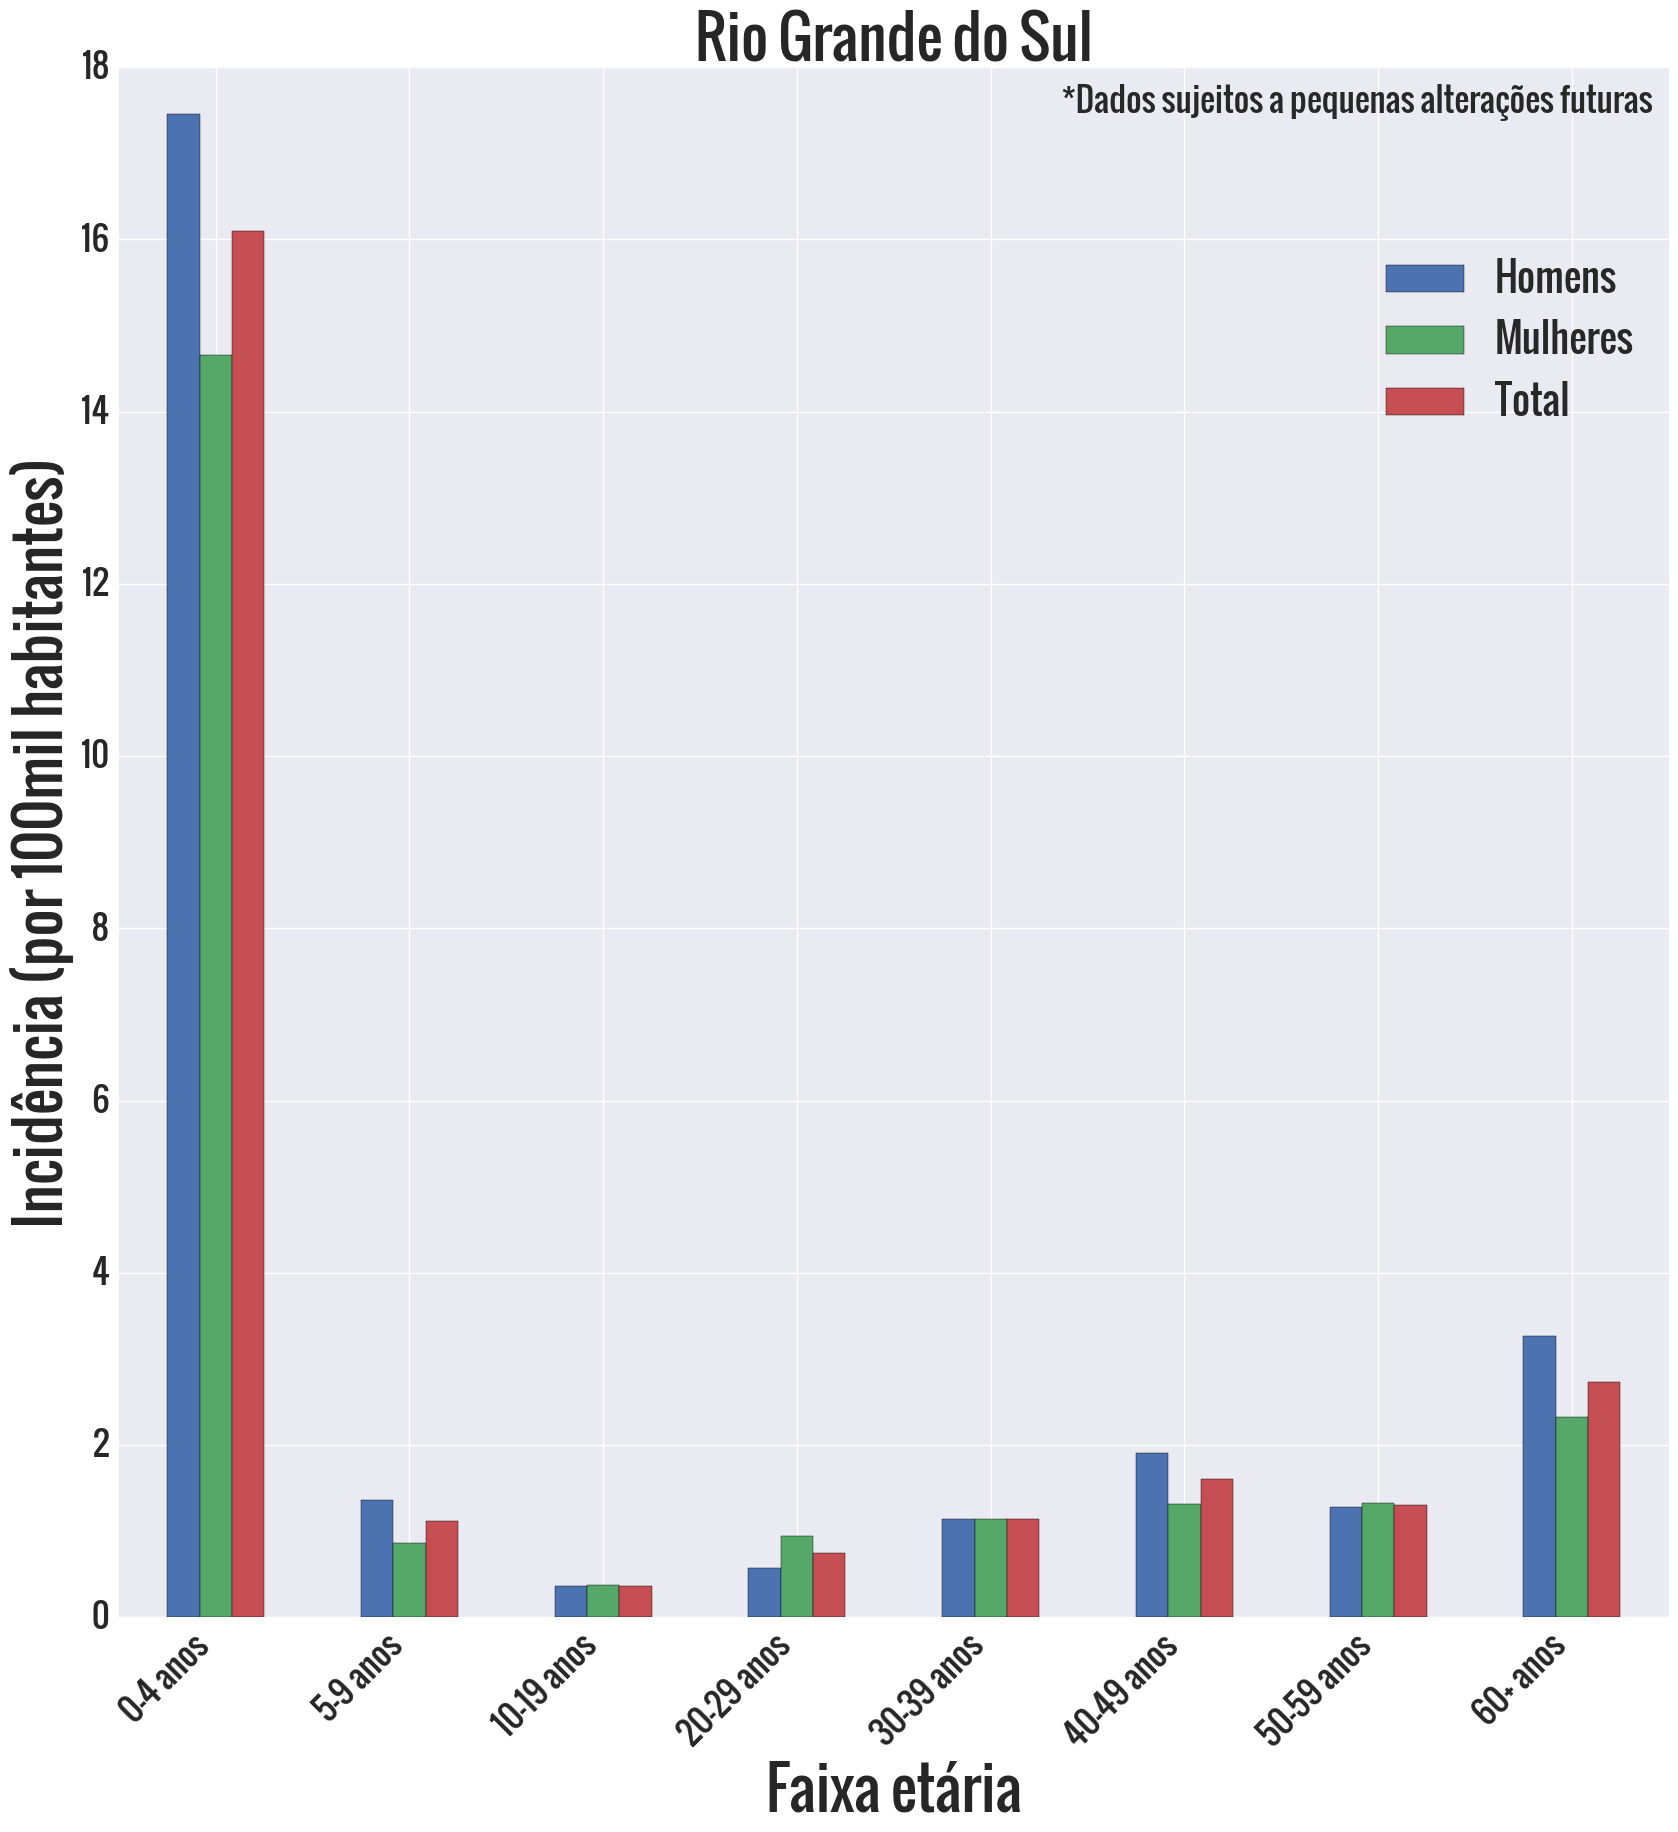

In [21]:
season = 2016
uf = 'Rio Grande do Sul'
week = 20
df_tmp = df_age_dist[(df_age_dist['Unidade da Federação'] == uf) & (df_age_dist['epiyear'] == season) & (df_age_dist['epiweek'] == week)]
plot_agedist(df_tmp)

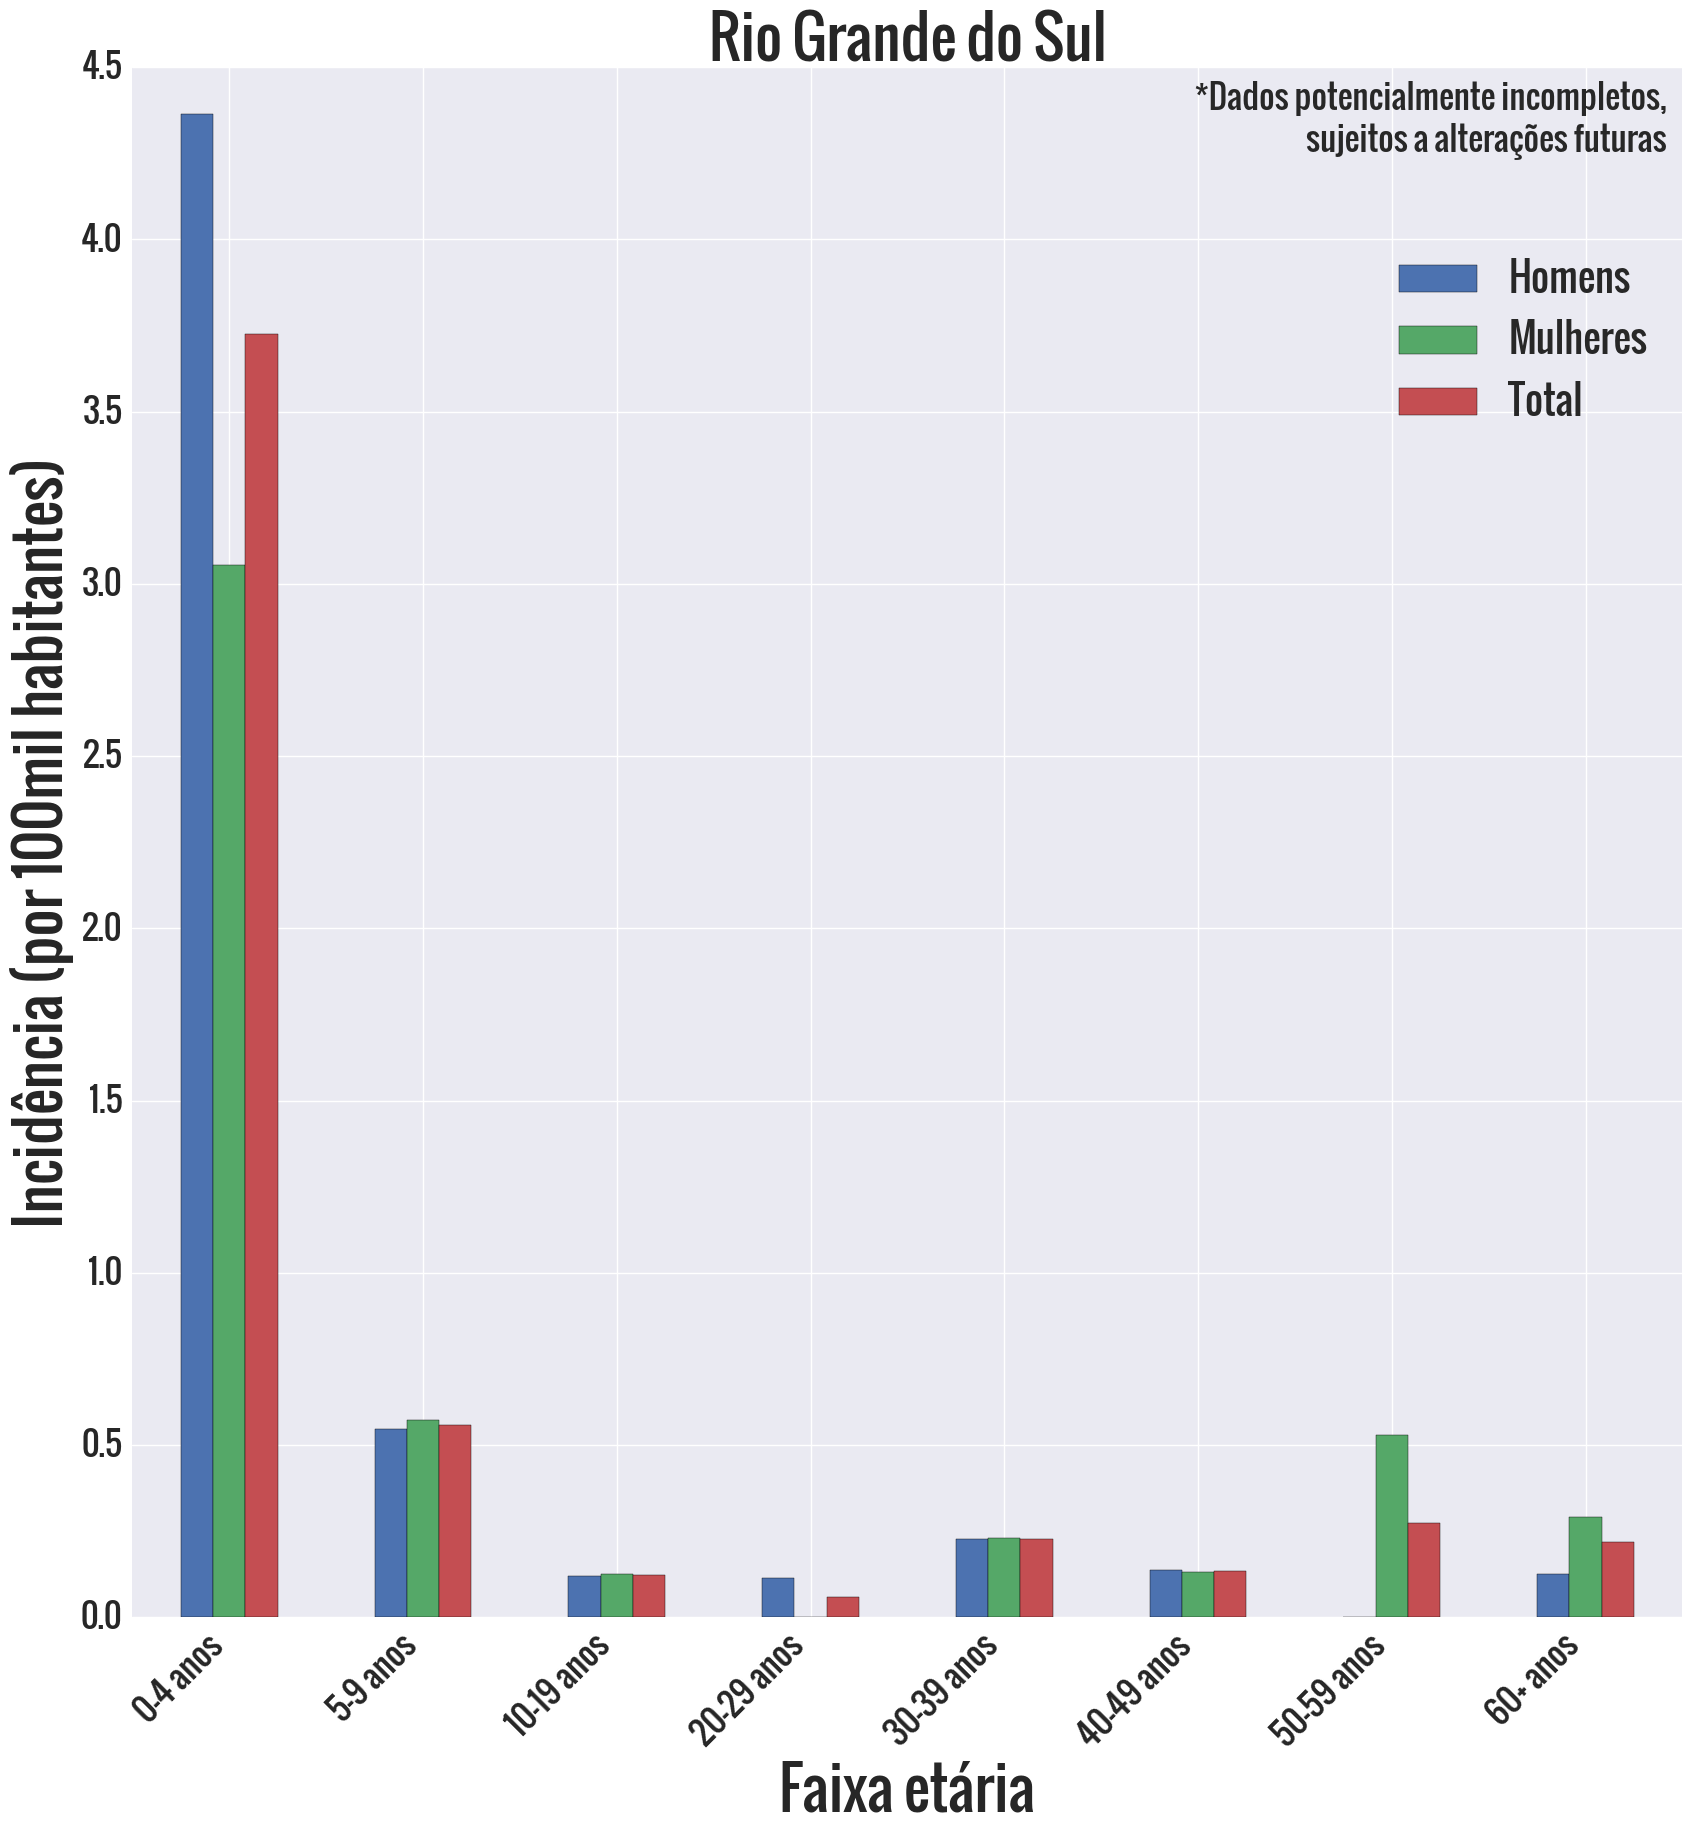

In [22]:
season = 2016
uf = 'Rio Grande do Sul'
week = 41
df_tmp = df_age_dist[(df_age_dist['Unidade da Federação'] == uf) & (df_age_dist['epiyear'] == season) & (df_age_dist['epiweek'] == week)]
plot_agedist(df_tmp)

## Incidence table information<a name="_incidence table information"></a>

In [23]:
season = 2016
week = 41
table_cols = ['Unidade da Federação', 'SRAG', '50%', '2.5%', '97.5%', 'Situation']
df_table = df.loc[(df['epiyear']==season) & (df['epiweek']==week), table_cols]

def report_inc(x, low, high, situation):
    if situation == 'stable':
        y = '%.2f' % x
    elif situation == 'estimated':
        y = '%.2f [%.2f - %.2f]' % (x, low, high)
    else:
        y = '*%.2f' % x
    return y

df_table['Incidência (por 100 mil hab.)'] = df_table[['50%', '2.5%', '97.5%', 'Situation']].apply(
    lambda row: report_inc(row['50%'], row['2.5%'], row['97.5%'], row['Situation']), axis=1)
situation_dict = {'stable':'Dado estável. Sujeito a pequenas alterações', 'estimated': 'Estimado. Sujeito a alterações',
                  'unknown': 'Dados incompletos. Sujeito a grandes alterações'}
df_table['Situação'] = df_table['Situation'].map(lambda x: situation_dict[x])
df_table[['Unidade da Federação', 'Situação', 'Incidência (por 100 mil hab.)']]

,Unidade da Federação,Situação,Incidência (por 100 mil hab.)
405,Rondônia,Dados incompletos. Sujeito a grandes alterações,*0.00
811,Acre,Dados incompletos. Sujeito a grandes alterações,*0.00
1217,Amazonas,Dados incompletos. Sujeito a grandes alterações,*0.00
1623,Roraima,Dados incompletos. Sujeito a grandes alterações,*0.00
2029,Pará,Estimado. Sujeito a alterações,0.16 [0.04 - 0.52]
2435,Amapá,Dados incompletos. Sujeito a grandes alterações,*0.00
2841,Tocantins,Dados incompletos. Sujeito a grandes alterações,*0.00
3247,Maranhão,Dados incompletos. Sujeito a grandes alterações,*0.01
3653,Piauí,Dados incompletos. Sujeito a grandes alterações,*0.00
4059,Ceará,Dados incompletos. Sujeito a grandes alterações,*0.00


# Summary panel<a name="_summary panel"></a>

From the data frame df -- which has detailed info with relevant columns --, we will build an aggregated data frame df_by_season to store the total counts per season, per location (state, region and country), as well as season level indicator.

In [24]:
season_cols = ['UF', 'Unidade da Federação', 'epiyear', 'SRAG',
             'Tipo', 'Situation',
             'Level']
df_tmp = df[season_cols].copy()
season_list = df_tmp.epiyear.unique()
for season in season_list:
    situation = list(df_tmp[df_tmp.epiyear==season].Situation.unique())
    if ('unknown' in situation or 'estimate' in situation):
        df_tmp.loc[df_tmp.epiyear == season, 'Situation'] = 'incomplete'
    else:
        df_tmp.loc[df_tmp.epiyear == season, 'Situation'] = 'stable'

In [25]:
df_tmp.head()

,UF,Unidade da Federação,epiyear,SRAG,Tipo,Situation,Level
0,11,Rondônia,2009,0.0,Estado,stable,L0
1,11,Rondônia,2009,0.0,Estado,stable,L0
2,11,Rondônia,2009,0.0,Estado,stable,L0
3,11,Rondônia,2009,0.0,Estado,stable,L0
4,11,Rondônia,2009,0.0,Estado,stable,L0


In [26]:
df_tmp.tail()

,UF,Unidade da Federação,epiyear,SRAG,Tipo,Situation,Level
12987,RegS,Regional Sul,2016,0.299411,Regional,incomplete,L1
12988,RegS,Regional Sul,2016,0.238478,Regional,incomplete,L0
12989,RegS,Regional Sul,2016,0.242680,Regional,incomplete,L0
12990,RegS,Regional Sul,2016,0.199607,Regional,incomplete,L0
12991,RegS,Regional Sul,2016,0.163888,Regional,incomplete,L0


In [27]:
df_by_season = df_age_dist[['UF', 'Unidade da Federação', 'epiyear', 'Sexo', 'SRAG',
             '0-4 anos', '5-9 anos', '10-19 anos', '20-29 anos', '30-39 anos',
             '40-49 anos', '50-59 anos', '60+ anos']].groupby(['UF', 'Unidade da Federação', 'epiyear', 'Sexo'],
                                                              as_index=False).sum()

In [28]:
def get_season_situation(x):
    season_situation = df_tmp[(df_tmp.UF == x.UF) & (df_tmp.epiyear == x.epiyear)].Situation.unique()[0]
    return season_situation

In [29]:
df_by_season['Situation'] = df_by_season.apply(get_season_situation, axis=1)

Data frame df_by_season has the total number of reported cases in column SRAG, the total per age bracket, and the situation of the data ("stable" or "incomplete"). The situation column should be interpreted in the same way as "stable" and "unknown" markers from the detailed panel. The same warnings should be raised when presenting the data 

In [30]:
df_by_season.head()

,UF,Unidade da Federação,epiyear,Sexo,SRAG,0-4 anos,5-9 anos,10-19 anos,20-29 anos,30-39 anos,40-49 anos,50-59 anos,60+ anos,Situation
0,11,Rondônia,2009,F,5.619507,5.301665,2.501657,4.386405,7.651061,4.755828,9.381548,6.819771,2.074043,stable
1,11,Rondônia,2009,M,3.095883,11.392838,4.763039,2.410670,1.228101,3.133519,1.934012,1.565925,0.000000,stable
2,11,Rondônia,2009,Total,4.327667,8.417236,3.660166,3.379281,4.379188,3.939909,5.518072,4.081200,0.986612,stable
3,11,Rondônia,2010,F,7.876758,43.140638,4.972960,2.525221,8.830301,4.633455,2.019427,1.618987,1.973905,stable
4,11,Rondônia,2010,M,4.112939,37.315353,2.375551,0.605635,0.000000,0.762939,1.890538,0.000000,0.000000,stable


In [31]:
df_by_season.tail()

,UF,Unidade da Federação,epiyear,Sexo,SRAG,0-4 anos,5-9 anos,10-19 anos,20-29 anos,30-39 anos,40-49 anos,50-59 anos,60+ anos,Situation
763,RegS,Regional Sul,2015,M,9.697437,74.604099,6.174453,2.332747,2.574791,3.299853,4.580455,6.250598,13.227721,stable
764,RegS,Regional Sul,2015,Total,9.122102,68.393668,6.220081,2.531896,2.936362,3.529931,4.293901,5.681815,11.860808,stable
765,RegS,Regional Sul,2016,F,30.859860,165.427878,16.857029,9.741663,14.646817,17.916570,20.608713,31.820861,41.915836,incomplete
766,RegS,Regional Sul,2016,M,31.122274,187.640569,18.643603,6.921652,9.688046,14.849564,21.381049,30.417943,47.675064,incomplete
767,RegS,Regional Sul,2016,Total,30.992667,176.824445,17.770301,8.309084,12.124877,16.377246,20.990580,31.145216,44.471114,incomplete


## Season level categorization:<a name="_season level categorization:"></a>

First we will create a temporary data frame to store the number of times each level was reported during each state and for each season. This can be done by crossing the info in df_tmp

In [32]:
df_by_season_level = pd.crosstab([df_tmp.UF, df_tmp['Unidade da Federação'], df_tmp.epiyear],
                    df_tmp.Level).reset_index()

In [33]:
df_by_season_level.columns.name = None
df_by_season_level.head()

,UF,Unidade da Federação,epiyear,L0,L1,L2,L3
0,11,Rondônia,2009,46,4,2,0
1,11,Rondônia,2010,46,2,3,1
2,11,Rondônia,2011,52,0,0,0
3,11,Rondônia,2012,52,0,0,0
4,11,Rondônia,2013,52,0,0,0


### Function to calculate seasonal level<a name="_function to calculate seasonal level"></a>

Using the information stored in df_by_season_level we can apply the defined criteria to obtain season's level:

In [34]:
def get_season_level(x):
    '''
    Generate season level code based on counts over weekly activity
    '''
    if x['L2'] + x['L3'] > 4:
        season_level = 'red'
    elif x['L2'] + x['L3'] > 1:
        season_level = 'orange'
    elif x['L1'] > 1:
        season_level = 'yellow'
    else:
        season_level = 'green'
    return season_level

### Example applying to a given entry<a name="_example applying to a given entry"></a>

We see that, for row 255, we have season 2016 for Regional Sul, which recorded so far 14 weeks at L0, 13 at L1, 6 at L2 and 8 at L3. Since we have more than 4 weeks with activity L2 or L3, the seasonal level should be red, as defined in our criteria.

In [35]:
df_by_season_level.ix[255]

UF                              RegS
Unidade da Federação    Regional Sul
epiyear                         2016
L0                                14
L1                                13
L2                                 6
L3                                 8
Name: 255, dtype: object

In [36]:
get_season_level(df_by_season_level[list(level_dict.keys())].ix[255])

'red'

### Applying to the whole dataset<a name="_applying to the whole dataset"></a>

Finally, column "Level" has the corresponding color code appropriate for season's activity level, based on pre-defined criteria:
- Red: if weekly incidence was above high or very high threshold for at least 5 weeks;
- Orange: weekly incidence above high or very high for at least 1 week;
- Yellow: if weekly incidence has only crossed the epidemic threshold, but not the high activity one;
- Green: if weekly incidence has not crossed the epidemic threshold.

In [37]:
df_by_season_level['Level'] = df_by_season_level[list(level_dict.keys())].apply(get_season_level, axis=1)

In [38]:
df_by_season_level.head()

,UF,Unidade da Federação,epiyear,L0,L1,L2,L3,Level
0,11,Rondônia,2009,46,4,2,0,orange
1,11,Rondônia,2010,46,2,3,1,orange
2,11,Rondônia,2011,52,0,0,0,green
3,11,Rondônia,2012,52,0,0,0,green
4,11,Rondônia,2013,52,0,0,0,green


In [39]:
df_by_season_level.tail()

,UF,Unidade da Federação,epiyear,L0,L1,L2,L3,Level
251,RegS,Regional Sul,2012,37,10,5,0,red
252,RegS,Regional Sul,2013,26,16,7,3,red
253,RegS,Regional Sul,2014,38,15,0,0,yellow
254,RegS,Regional Sul,2015,41,11,0,0,yellow
255,RegS,Regional Sul,2016,14,13,6,8,red


In [40]:
df_by_season_level[df_by_season_level.UF == '43']

,UF,Unidade da Federação,epiyear,L0,L1,L2,L3,Level
176,43,Rio Grande do Sul,2009,33,10,3,6,red
177,43,Rio Grande do Sul,2010,51,1,0,0,green
178,43,Rio Grande do Sul,2011,41,10,1,0,yellow
179,43,Rio Grande do Sul,2012,36,9,3,4,red
180,43,Rio Grande do Sul,2013,30,16,6,0,red
181,43,Rio Grande do Sul,2014,31,22,0,0,yellow
182,43,Rio Grande do Sul,2015,29,23,0,0,yellow
183,43,Rio Grande do Sul,2016,12,13,13,3,red


In [41]:
df_by_season = df_by_season.merge(df_by_season_level[['UF', 'epiyear', 'Level']], on=['UF', 'epiyear'], how='left')

In [42]:
df_by_season.head()

,UF,Unidade da Federação,epiyear,Sexo,SRAG,0-4 anos,5-9 anos,10-19 anos,20-29 anos,30-39 anos,40-49 anos,50-59 anos,60+ anos,Situation,Level
0,11,Rondônia,2009,F,5.619507,5.301665,2.501657,4.386405,7.651061,4.755828,9.381548,6.819771,2.074043,stable,orange
1,11,Rondônia,2009,M,3.095883,11.392838,4.763039,2.410670,1.228101,3.133519,1.934012,1.565925,0.000000,stable,orange
2,11,Rondônia,2009,Total,4.327667,8.417236,3.660166,3.379281,4.379188,3.939909,5.518072,4.081200,0.986612,stable,orange
3,11,Rondônia,2010,F,7.876758,43.140638,4.972960,2.525221,8.830301,4.633455,2.019427,1.618987,1.973905,stable,orange
4,11,Rondônia,2010,M,4.112939,37.315353,2.375551,0.605635,0.000000,0.762939,1.890538,0.000000,0.000000,stable,orange


In [43]:
df_by_season.tail()

,UF,Unidade da Federação,epiyear,Sexo,SRAG,0-4 anos,5-9 anos,10-19 anos,20-29 anos,30-39 anos,40-49 anos,50-59 anos,60+ anos,Situation,Level
763,RegS,Regional Sul,2015,M,9.697437,74.604099,6.174453,2.332747,2.574791,3.299853,4.580455,6.250598,13.227721,stable,yellow
764,RegS,Regional Sul,2015,Total,9.122102,68.393668,6.220081,2.531896,2.936362,3.529931,4.293901,5.681815,11.860808,stable,yellow
765,RegS,Regional Sul,2016,F,30.859860,165.427878,16.857029,9.741663,14.646817,17.916570,20.608713,31.820861,41.915836,incomplete,red
766,RegS,Regional Sul,2016,M,31.122274,187.640569,18.643603,6.921652,9.688046,14.849564,21.381049,30.417943,47.675064,incomplete,red
767,RegS,Regional Sul,2016,Total,30.992667,176.824445,17.770301,8.309084,12.124877,16.377246,20.990580,31.145216,44.471114,incomplete,red


## Seasonal age distribution<a name="_seasonal age distribution"></a>

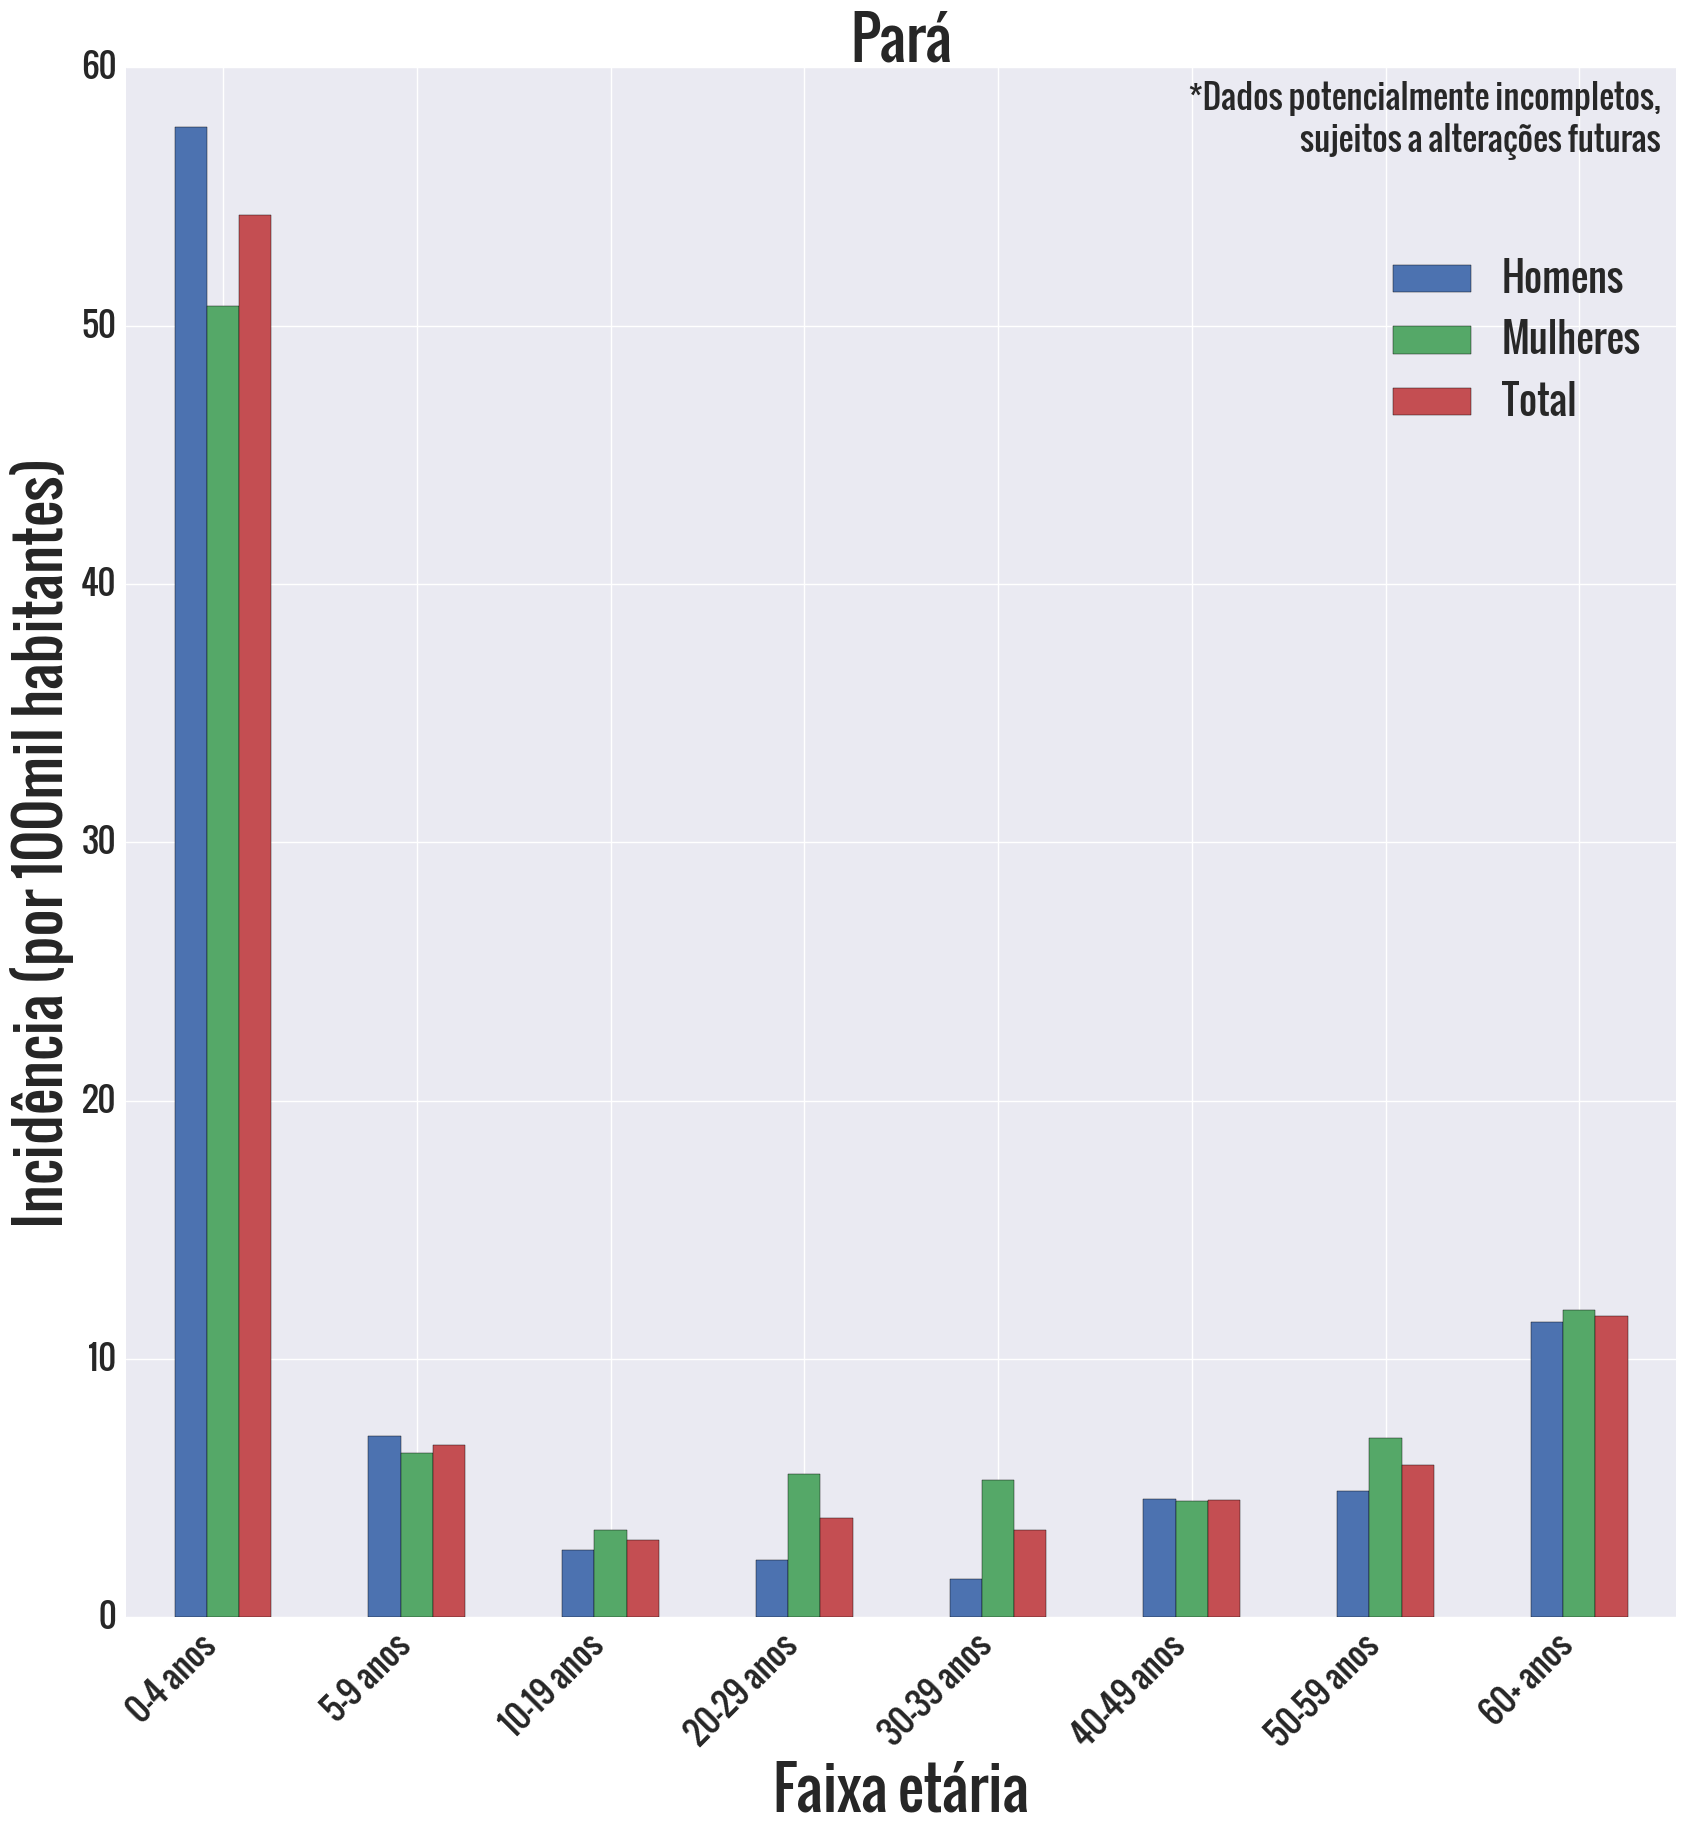

In [47]:
season = 2016
uf = 'Pará'
df_tmp = df_by_season[(df_by_season['Unidade da Federação'] == uf) & (df_by_season['epiyear'] == season)]
plot_agedist(df_tmp)

## Incidence table information<a name="_incidence table information"></a>

In [52]:
season = 2016
table_cols = ['Unidade da Federação', 'SRAG', 'Situation']
df_table = df_by_season.loc[(df_by_season['epiyear']==season) & (df_by_season['Sexo'] == 'Total'), table_cols]

def report_inc(x, sitaution, low=None, high=None):
    if situation == 'stable':
        y = '%.2f' % x
    elif situation == 'estimated':
        y = '%.2f [%.2f - %.2f]' % (x, low, high)
    else:
        y = '*%.2f' % x
    return y

df_table['Incidência (por 100 mil hab.)'] = df_table[['SRAG', 'Situation']].apply(
    lambda row: report_inc(row['SRAG'], row['Situation']), axis=1)
situation_dict = {'stable':'Dado estável. Sujeito a pequenas alterações',
                  'incomplete': 'Dados incompletos. Sujeito a grandes alterações'}
df_table['Situação'] = df_table['Situation'].map(lambda x: situation_dict[x])
df_table[['Unidade da Federação', 'Situação', 'Incidência (por 100 mil hab.)']]

,Unidade da Federação,Situação,Incidência (por 100 mil hab.)
23,Rondônia,Dados incompletos. Sujeito a grandes alterações,*8.34
47,Acre,Dados incompletos. Sujeito a grandes alterações,*34.77
71,Amazonas,Dados incompletos. Sujeito a grandes alterações,*2.25
95,Roraima,Dados incompletos. Sujeito a grandes alterações,*3.69
119,Pará,Dados incompletos. Sujeito a grandes alterações,*9.37
143,Amapá,Dados incompletos. Sujeito a grandes alterações,*3.07
167,Tocantins,Dados incompletos. Sujeito a grandes alterações,*3.00
191,Maranhão,Dados incompletos. Sujeito a grandes alterações,*0.40
215,Piauí,Dados incompletos. Sujeito a grandes alterações,*5.17
239,Ceará,Dados incompletos. Sujeito a grandes alterações,*2.92
